In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
usdt_ticker = yf.Ticker("USDT-USD")
csv_file = "usdt.csv"

# Check if the CSV file exists and delete it if it does
if os.path.exists(csv_file):
    os.remove(csv_file)

# Fetch the historical data for Tether (USDT)
usdt = usdt_ticker.history(period="max")
usdt.to_csv(csv_file)

# Load the data from the CSV file into a DataFrame
usdt = pd.read_csv(csv_file, index_col=0)
usdt

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,1.010870,1.013270,0.996515,1.008180,358188000,0.0,0.0
2017-11-10 00:00:00+00:00,1.006500,1.024230,0.995486,1.006010,756446016,0.0,0.0
2017-11-11 00:00:00+00:00,1.005980,1.026210,0.995799,1.008990,746227968,0.0,0.0
2017-11-12 00:00:00+00:00,1.006020,1.105910,0.967601,1.012470,1466060032,0.0,0.0
2017-11-13 00:00:00+00:00,1.004480,1.029290,0.975103,1.009350,767884032,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,0.999463,1.000000,0.999205,0.999467,35823242153,0.0,0.0
2024-06-16 00:00:00+00:00,0.999438,1.000105,0.999039,0.999293,31962850043,0.0,0.0
2024-06-17 00:00:00+00:00,0.999341,1.000182,0.999004,0.999645,60712949361,0.0,0.0


<Axes: xlabel='Date'>

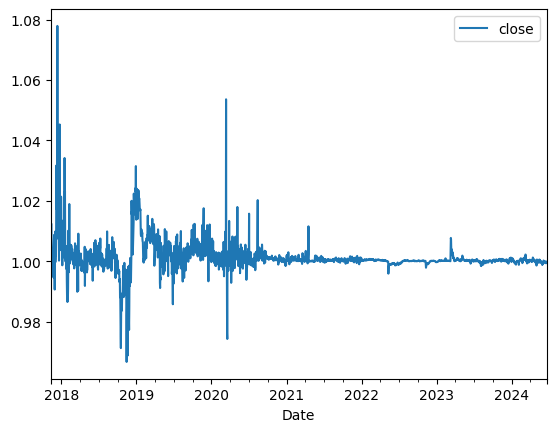

In [3]:
# Convert index to datetime
usdt.index = pd.to_datetime(usdt.index)

# Remove unnecessary columns
del usdt["Dividends"]
del usdt["Stock Splits"]

# Convert column names to lowercase
usdt.columns = [c.lower() for c in usdt.columns]

# Plot the closing price
usdt.plot.line(y="close", use_index=True)

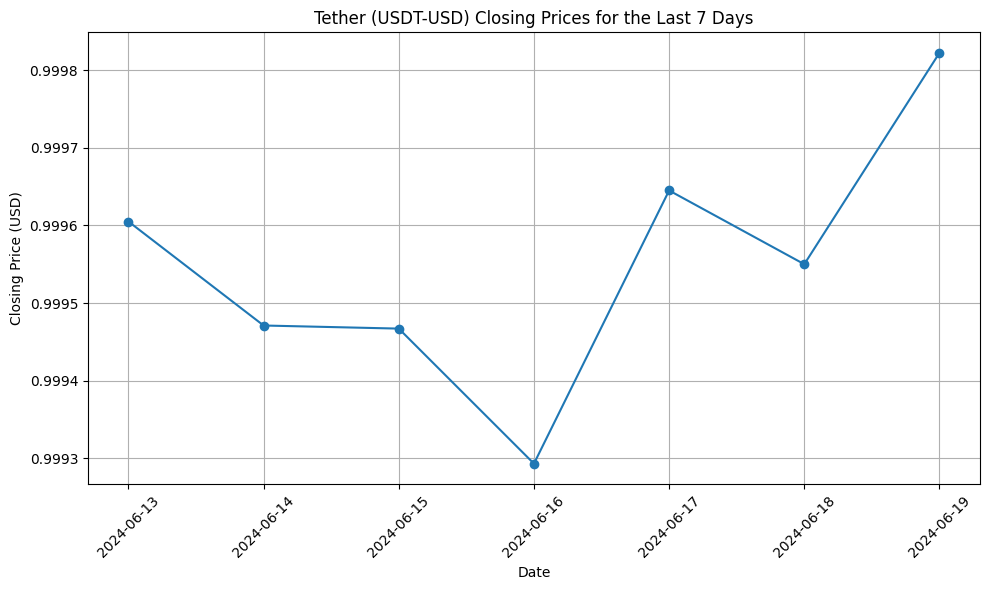

In [4]:
# Filter the data for the last seven days
last_seven_days_usdt = usdt[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days_usdt.index, last_seven_days_usdt['close'], marker='o')
plt.title('Tether (USDT-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
wiki = pd.read_csv("tether_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.000000,0.000000,0.000000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-06-15,0.300000,-0.056709,0.080556
2024-06-16,0.333333,-0.089898,0.113889
2024-06-17,0.333333,-0.089898,0.113889
2024-06-18,0.333333,-0.089898,0.113889


In [6]:
# Assuming 'usdt' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
usdt = usdt.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
usdt["tomorrow"] = usdt["close"].shift(-1)
usdt["target"] = (usdt["tomorrow"] > usdt["close"]).astype(int)
usdt["target"].value_counts()


target
0    1238
1    1177
Name: count, dtype: int64

In [7]:
usdt

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2017-11-09 00:00:00+00:00,1.010870,1.013270,0.996515,1.008180,358188000,0.000000,0.000000,0.000000,1.006010,0
2017-11-10 00:00:00+00:00,1.006500,1.024230,0.995486,1.006010,756446016,0.000000,0.000000,0.000000,1.008990,1
2017-11-11 00:00:00+00:00,1.005980,1.026210,0.995799,1.008990,746227968,0.000000,0.000000,0.000000,1.012470,1
2017-11-12 00:00:00+00:00,1.006020,1.105910,0.967601,1.012470,1466060032,0.000000,0.000000,0.000000,1.009350,0
2017-11-13 00:00:00+00:00,1.004480,1.029290,0.975103,1.009350,767884032,0.000000,0.000000,0.000000,1.006830,0
...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,0.999463,1.000000,0.999205,0.999467,35823242153,0.300000,-0.056709,0.080556,0.999293,0
2024-06-16 00:00:00+00:00,0.999438,1.000105,0.999039,0.999293,31962850043,0.333333,-0.089898,0.113889,0.999645,1
2024-06-17 00:00:00+00:00,0.999341,1.000182,0.999004,0.999645,60712949361,0.333333,-0.089898,0.113889,0.999550,0
2024-06-18 00:00:00+00:00,0.999650,1.001334,0.999308,0.999550,78695656625,0.333333,-0.089898,0.113889,0.999822,1


In [9]:
usdt.to_csv('usdtSentiment.csv')